## **Preposessing Dataset Training**

---

Dataset full_text berasal dari penelitian: [Emotion dataset from Indonesian public opinion](https://www.sciencedirect.com/science/article/pii/S2352340922006588?via%3Dihub)

Dataset                              : [link Dataset](https://github.com/Ricco48/Emotion-Dataset-from-Indonesian-Public-Opinion)

## Installing Package

In [9]:
! pip install sastrawi

## Import Library

In [10]:
import pandas as pd
import numpy
import collections
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import re
from nltk import tokenize
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

import warnings
warnings.filterwarnings("ignore")

from IPython.display import display, HTML

# Load Data Train

In [11]:
selected_columns = ["full_text", "username"]

In [12]:
from_sociallabs = pd.read_csv("../Dataset/Testing/Raw/socialab.tweets.csv", usecols=selected_columns)
from_sociallabs

,full_text,username
0,@m_nurfatoni Anies seperti Ahmad Dahlan jamam now,meditegal
1,@ardibhironx Itu ide AHOK dan udah dijalankan....,AnonimousNama
2,@bagaskara645y @logikapolitikid Anies sama Pra...,RivaldiFaza
3,pernyataan di depan para pendukungnya. Semoga ...,eva_aruna
4,@BangPino__ Pemilih Anies militan tak tergiur ...,meditegal
...,...,...
28966,#Cek Bisa COD BELI 1 DAPAT 2 #Dreamy #Sweet #M...,dosopriyanto
28967,ลองดู [COD] Flash Sale 1กิโล แมคคายกกระสอบ ตุ๊...,Floraa72270993
28968,wal cod an shopee kawa pakai qris lah yuu,banjarbase
28969,Temukan [BS] BISA COD Light Stick TREASURE BLU...,RacunShopee35


Gabungkan semua data menjadi satu dataframe.

In [13]:
train_data = pd.concat([from_sociallabs])
train_data.reset_index(inplace=True,drop=True)
train_data

,full_text,username
0,@m_nurfatoni Anies seperti Ahmad Dahlan jamam now,meditegal
1,@ardibhironx Itu ide AHOK dan udah dijalankan....,AnonimousNama
2,@bagaskara645y @logikapolitikid Anies sama Pra...,RivaldiFaza
3,pernyataan di depan para pendukungnya. Semoga ...,eva_aruna
4,@BangPino__ Pemilih Anies militan tak tergiur ...,meditegal
...,...,...
28966,#Cek Bisa COD BELI 1 DAPAT 2 #Dreamy #Sweet #M...,dosopriyanto
28967,ลองดู [COD] Flash Sale 1กิโล แมคคายกกระสอบ ตุ๊...,Floraa72270993
28968,wal cod an shopee kawa pakai qris lah yuu,banjarbase
28969,Temukan [BS] BISA COD Light Stick TREASURE BLU...,RacunShopee35


In [14]:
train_data.to_csv('../Dataset/Testing/not_preposessing3.csv')

# EDA

Sebelum melakukan preprossing pada data, akan dilakukan eda secara singkat untuk melihat tipe data dan null values pada data.

In [15]:
eda_data = train_data.copy()

## Null Values

In [16]:
print("Null Values:")
eda_data.isna().sum()

Null Values:


full_text    0
username     0
dtype: int64

## Data Types

In [17]:
print("Data Types:")
eda_data.info()

Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28971 entries, 0 to 28970
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   full_text  28971 non-null  object
 1   username   28971 non-null  object
dtypes: object(2)
memory usage: 452.8+ KB


In [18]:
eda_data.head()


,full_text,username
0,@m_nurfatoni Anies seperti Ahmad Dahlan jamam now,meditegal
1,@ardibhironx Itu ide AHOK dan udah dijalankan....,AnonimousNama
2,@bagaskara645y @logikapolitikid Anies sama Pra...,RivaldiFaza
3,pernyataan di depan para pendukungnya. Semoga ...,eva_aruna
4,@BangPino__ Pemilih Anies militan tak tergiur ...,meditegal


## Data Distribution

In [19]:
eda_data['Length'] = eda_data['full_text'].str.len()
eda_data.head(10)

,full_text,username,Length
0,@m_nurfatoni Anies seperti Ahmad Dahlan jamam now,meditegal,49
1,@ardibhironx Itu ide AHOK dan udah dijalankan....,AnonimousNama,73
2,@bagaskara645y @logikapolitikid Anies sama Pra...,RivaldiFaza,147
3,pernyataan di depan para pendukungnya. Semoga ...,eva_aruna,197
4,@BangPino__ Pemilih Anies militan tak tergiur ...,meditegal,69
5,@musniumar Dan adik kandung Anda itu dgn embel...,enkaeriharmat,91
6,"@Dennysiregar7 Sang kadrun melihat, sambil men...",pradipta944,124
7,@yuwantino12 @logikapolitikid @ganjarpranowo K...,RivaldiFaza,181
8,@jovan_ndeso @gibran_tweet Kene ketoke ora min...,megantari_jogja,140
9,@msaid_didu @aniesbaswedan @cakimiNOW Caleg da...,saya_rya,219


In [20]:
print(f"Rata-rata panjang karakter full_text : {eda_data['Length'].mean():.2f}")

Rata-rata panjang karakter full_text : 167.00


In [21]:
print(f"Jumlah panjang karakter full_text  : {eda_data['Length'].sum():.2f}")

Jumlah panjang karakter full_text  : 4838256.00


In [22]:
def word_count(full_text):
    full_text_list = full_text.split()
    return len(full_text_list)

In [23]:
eda_data['Word_count'] = eda_data['full_text'].apply(word_count)
eda_data.head(10)

,full_text,username,Length,Word_count
0,@m_nurfatoni Anies seperti Ahmad Dahlan jamam now,meditegal,49,7
1,@ardibhironx Itu ide AHOK dan udah dijalankan....,AnonimousNama,73,12
2,@bagaskara645y @logikapolitikid Anies sama Pra...,RivaldiFaza,147,21
3,pernyataan di depan para pendukungnya. Semoga ...,eva_aruna,197,27
4,@BangPino__ Pemilih Anies militan tak tergiur ...,meditegal,69,10
5,@musniumar Dan adik kandung Anda itu dgn embel...,enkaeriharmat,91,14
6,"@Dennysiregar7 Sang kadrun melihat, sambil men...",pradipta944,124,16
7,@yuwantino12 @logikapolitikid @ganjarpranowo K...,RivaldiFaza,181,28
8,@jovan_ndeso @gibran_tweet Kene ketoke ora min...,megantari_jogja,140,22
9,@msaid_didu @aniesbaswedan @cakimiNOW Caleg da...,saya_rya,219,31


In [24]:
print(f"Jumlah kata : {eda_data['Word_count'].sum():.2f}")

Jumlah kata : 671809.00


In [25]:
print(f"Rata-rata jumlah kata : {eda_data['Word_count'].mean():.2f}")

Rata-rata jumlah kata : 23.19


In [26]:
eda_data['mean_word_length'] = eda_data['full_text'].map(lambda rev: numpy.mean([len(word) for word in rev.split()]))
eda_data.head(10)

,full_text,username,Length,Word_count,mean_word_length
0,@m_nurfatoni Anies seperti Ahmad Dahlan jamam now,meditegal,49,7,6.142857
1,@ardibhironx Itu ide AHOK dan udah dijalankan....,AnonimousNama,73,12,5.166667
2,@bagaskara645y @logikapolitikid Anies sama Pra...,RivaldiFaza,147,21,6.047619
3,pernyataan di depan para pendukungnya. Semoga ...,eva_aruna,197,27,6.333333
4,@BangPino__ Pemilih Anies militan tak tergiur ...,meditegal,69,10,6.000000
5,@musniumar Dan adik kandung Anda itu dgn embel...,enkaeriharmat,91,14,5.571429
6,"@Dennysiregar7 Sang kadrun melihat, sambil men...",pradipta944,124,16,6.812500
7,@yuwantino12 @logikapolitikid @ganjarpranowo K...,RivaldiFaza,181,28,5.500000
8,@jovan_ndeso @gibran_tweet Kene ketoke ora min...,megantari_jogja,140,22,5.409091
9,@msaid_didu @aniesbaswedan @cakimiNOW Caleg da...,saya_rya,219,31,6.064516


In [27]:
eda_data['mean_sent_length'] = eda_data['full_text'].map(lambda rev: numpy.mean([len(sent) for sent in tokenize.sent_tokenize(rev)]))
eda_data.head(10)

,full_text,username,Length,Word_count,mean_word_length,mean_sent_length
0,@m_nurfatoni Anies seperti Ahmad Dahlan jamam now,meditegal,49,7,6.142857,49.0
1,@ardibhironx Itu ide AHOK dan udah dijalankan....,AnonimousNama,73,12,5.166667,36.0
2,@bagaskara645y @logikapolitikid Anies sama Pra...,RivaldiFaza,147,21,6.047619,147.0
3,pernyataan di depan para pendukungnya. Semoga ...,eva_aruna,197,27,6.333333,98.0
4,@BangPino__ Pemilih Anies militan tak tergiur ...,meditegal,69,10,6.000000,69.0
5,@musniumar Dan adik kandung Anda itu dgn embel...,enkaeriharmat,91,14,5.571429,91.0
6,"@Dennysiregar7 Sang kadrun melihat, sambil men...",pradipta944,124,16,6.812500,61.5
7,@yuwantino12 @logikapolitikid @ganjarpranowo K...,RivaldiFaza,181,28,5.500000,181.0
8,@jovan_ndeso @gibran_tweet Kene ketoke ora min...,megantari_jogja,140,22,5.409091,140.0
9,@msaid_didu @aniesbaswedan @cakimiNOW Caleg da...,saya_rya,219,31,6.064516,108.5


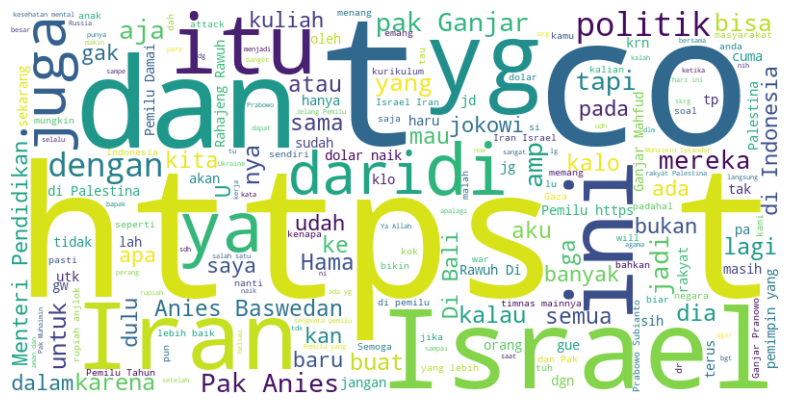

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Menggabungkan semua teks dalam satu string
all_full_texts = ' '.join(eda_data['full_text'])

# Membuat wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_full_texts)

# Menampilkan wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# Preprocessing

In [29]:
import copy

train_data_copy = copy.deepcopy(train_data)


## Case Folding

### Lowercase

In [30]:
def full_text_lowercase(full_text):
    full_text = full_text.lower()
    return full_text

In [31]:
%%time
train_data["full_text"] = train_data["full_text"].apply(full_text_lowercase)

CPU times: total: 15.6 ms
Wall time: 23.6 ms


In [32]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['full_text'],
    'After ': train_data['full_text']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,@m_nurfatoni Anies seperti Ahmad Dahlan jamam now,@m_nurfatoni anies seperti ahmad dahlan jamam now
1,@ardibhironx Itu ide AHOK dan udah dijalankan. Anies cuma ganti nama aja.,@ardibhironx itu ide ahok dan udah dijalankan. anies cuma ganti nama aja.
2,@bagaskara645y @logikapolitikid Anies sama Prabowo klo Anies kalah mereka ke Prabowo klo Prabowo kalah mereka ke Anies kelompok mereka kaya parasit,@bagaskara645y @logikapolitikid anies sama prabowo klo anies kalah mereka ke prabowo klo prabowo kalah mereka ke anies kelompok mereka kaya parasit
3,pernyataan di depan para pendukungnya. Semoga hasil survei tersebut dapat menjadi motivasi bagi Anies Baswedan-Cak Imin (AMIN) untuk terus bekerja keras dan memberikan yang terbaik bagi masyarakat.,pernyataan di depan para pendukungnya. semoga hasil survei tersebut dapat menjadi motivasi bagi anies baswedan-cak imin (amin) untuk terus bekerja keras dan memberikan yang terbaik bagi masyarakat.
4,@BangPino__ Pemilih Anies militan tak tergiur uang bansos dan jabatan,@bangpino__ pemilih anies militan tak tergiur uang bansos dan jabatan
5,@musniumar Dan adik kandung Anda itu dgn embel-embel NU-nya Anda 'Arahkan' utk pilih Anies?,@musniumar dan adik kandung anda itu dgn embel-embel nu-nya anda 'arahkan' utk pilih anies?
6,"@Dennysiregar7 Sang kadrun melihat, sambil menikmati kenaikkan suara anies. Semakin brutal banteng, semakin naik suara anis.","@dennysiregar7 sang kadrun melihat, sambil menikmati kenaikkan suara anies. semakin brutal banteng, semakin naik suara anis."
7,@yuwantino12 @logikapolitikid @ganjarpranowo Klo Anies kalah mereka ke Prabowo klo Prabowo kalah mereka ke Anies yah ibaratnya kaya parasit hrus cri inang yg pas biar bsa di kontrol,@yuwantino12 @logikapolitikid @ganjarpranowo klo anies kalah mereka ke prabowo klo prabowo kalah mereka ke anies yah ibaratnya kaya parasit hrus cri inang yg pas biar bsa di kontrol
8,"@jovan_ndeso @gibran_tweet Kene ketoke ora minat janji2 ne pak Wowo plus bocil kuwi, Pertarungan sengit Bpk Ganjar karo bpk Anies, Cak... 🤭🤔","@jovan_ndeso @gibran_tweet kene ketoke ora minat janji2 ne pak wowo plus bocil kuwi, pertarungan sengit bpk ganjar karo bpk anies, cak... 🤭🤔"
9,"@msaid_didu @aniesbaswedan @cakimiNOW Caleg dari Partai pendukung seharusnya diwajibkan mencantumkan nama dan foto Pak Anies jg dunk. Partai pendukung jg seharusnya rangkul relawan, biar bs jadi saksi jg utk para caleg","@msaid_didu @aniesbaswedan @cakiminow caleg dari partai pendukung seharusnya diwajibkan mencantumkan nama dan foto pak anies jg dunk. partai pendukung jg seharusnya rangkul relawan, biar bs jadi saksi jg utk para caleg"


In [33]:

display(HTML(comparison_df.tail(1).to_html()))

,Before,After
28970,wts / want to sell INA lfb Postcard chill kill BAG ver red Velvet Irene Wendy seulgi Joy Yeri red Velvet 22k/member set Take all 110k NO SENSITIF BUYER Bisa shopee bisa keep event (dp) bisa live shopee bisa cod Jakarta Tgs. wts Postcards red Velvet,wts / want to sell ina lfb postcard chill kill bag ver red velvet irene wendy seulgi joy yeri red velvet 22k/member set take all 110k no sensitif buyer bisa shopee bisa keep event (dp) bisa live shopee bisa cod jakarta tgs. wts postcards red velvet


In [34]:
%%time
train_data_copy["full_text"] = train_data_copy["full_text"].apply(full_text_lowercase)

CPU times: total: 15.6 ms
Wall time: 24.2 ms


## Cleansing

### Menghapus username

In [35]:
def full_text_delete_username(full_text):
    userPattern       = '@[^\s]+'
    # Ngehapus kata "username" 
    full_text = re.sub(userPattern, '', full_text)
    
    return full_text

In [36]:
%%time
train_data["full_text"] = train_data["full_text"].apply(full_text_delete_username)

CPU times: total: 31.2 ms
Wall time: 50.7 ms


In [37]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['full_text'],
    'After ': train_data['full_text']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,@m_nurfatoni anies seperti ahmad dahlan jamam now,anies seperti ahmad dahlan jamam now
1,@ardibhironx itu ide ahok dan udah dijalankan. anies cuma ganti nama aja.,itu ide ahok dan udah dijalankan. anies cuma ganti nama aja.
2,@bagaskara645y @logikapolitikid anies sama prabowo klo anies kalah mereka ke prabowo klo prabowo kalah mereka ke anies kelompok mereka kaya parasit,anies sama prabowo klo anies kalah mereka ke prabowo klo prabowo kalah mereka ke anies kelompok mereka kaya parasit
3,pernyataan di depan para pendukungnya. semoga hasil survei tersebut dapat menjadi motivasi bagi anies baswedan-cak imin (amin) untuk terus bekerja keras dan memberikan yang terbaik bagi masyarakat.,pernyataan di depan para pendukungnya. semoga hasil survei tersebut dapat menjadi motivasi bagi anies baswedan-cak imin (amin) untuk terus bekerja keras dan memberikan yang terbaik bagi masyarakat.
4,@bangpino__ pemilih anies militan tak tergiur uang bansos dan jabatan,pemilih anies militan tak tergiur uang bansos dan jabatan
5,@musniumar dan adik kandung anda itu dgn embel-embel nu-nya anda 'arahkan' utk pilih anies?,dan adik kandung anda itu dgn embel-embel nu-nya anda 'arahkan' utk pilih anies?
6,"@dennysiregar7 sang kadrun melihat, sambil menikmati kenaikkan suara anies. semakin brutal banteng, semakin naik suara anis.","sang kadrun melihat, sambil menikmati kenaikkan suara anies. semakin brutal banteng, semakin naik suara anis."
7,@yuwantino12 @logikapolitikid @ganjarpranowo klo anies kalah mereka ke prabowo klo prabowo kalah mereka ke anies yah ibaratnya kaya parasit hrus cri inang yg pas biar bsa di kontrol,klo anies kalah mereka ke prabowo klo prabowo kalah mereka ke anies yah ibaratnya kaya parasit hrus cri inang yg pas biar bsa di kontrol
8,"@jovan_ndeso @gibran_tweet kene ketoke ora minat janji2 ne pak wowo plus bocil kuwi, pertarungan sengit bpk ganjar karo bpk anies, cak... 🤭🤔","kene ketoke ora minat janji2 ne pak wowo plus bocil kuwi, pertarungan sengit bpk ganjar karo bpk anies, cak... 🤭🤔"
9,"@msaid_didu @aniesbaswedan @cakiminow caleg dari partai pendukung seharusnya diwajibkan mencantumkan nama dan foto pak anies jg dunk. partai pendukung jg seharusnya rangkul relawan, biar bs jadi saksi jg utk para caleg","caleg dari partai pendukung seharusnya diwajibkan mencantumkan nama dan foto pak anies jg dunk. partai pendukung jg seharusnya rangkul relawan, biar bs jadi saksi jg utk para caleg"


In [38]:

display(HTML(comparison_df.tail(1).to_html()))

,Before,After
28970,wts / want to sell ina lfb postcard chill kill bag ver red velvet irene wendy seulgi joy yeri red velvet 22k/member set take all 110k no sensitif buyer bisa shopee bisa keep event (dp) bisa live shopee bisa cod jakarta tgs. wts postcards red velvet,wts / want to sell ina lfb postcard chill kill bag ver red velvet irene wendy seulgi joy yeri red velvet 22k/member set take all 110k no sensitif buyer bisa shopee bisa keep event (dp) bisa live shopee bisa cod jakarta tgs. wts postcards red velvet


In [39]:
%%time
train_data_copy["full_text"] = train_data_copy["full_text"].apply(full_text_delete_username)

CPU times: total: 46.9 ms
Wall time: 58.2 ms


### Menghapus url

In [40]:
def full_text_delete_url(full_text):
    urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|(www\.)[^ ]*|url)" #Pola ngehapus url
    full_text = re.sub(urlPattern, '', full_text)
    return full_text

In [41]:
%%time
train_data["full_text"] = train_data["full_text"].apply(full_text_delete_url)

CPU times: total: 203 ms
Wall time: 263 ms


In [42]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['full_text'],
    'After ': train_data['full_text']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,anies seperti ahmad dahlan jamam now,anies seperti ahmad dahlan jamam now
1,itu ide ahok dan udah dijalankan. anies cuma ganti nama aja.,itu ide ahok dan udah dijalankan. anies cuma ganti nama aja.
2,anies sama prabowo klo anies kalah mereka ke prabowo klo prabowo kalah mereka ke anies kelompok mereka kaya parasit,anies sama prabowo klo anies kalah mereka ke prabowo klo prabowo kalah mereka ke anies kelompok mereka kaya parasit
3,pernyataan di depan para pendukungnya. semoga hasil survei tersebut dapat menjadi motivasi bagi anies baswedan-cak imin (amin) untuk terus bekerja keras dan memberikan yang terbaik bagi masyarakat.,pernyataan di depan para pendukungnya. semoga hasil survei tersebut dapat menjadi motivasi bagi anies baswedan-cak imin (amin) untuk terus bekerja keras dan memberikan yang terbaik bagi masyarakat.
4,pemilih anies militan tak tergiur uang bansos dan jabatan,pemilih anies militan tak tergiur uang bansos dan jabatan
5,dan adik kandung anda itu dgn embel-embel nu-nya anda 'arahkan' utk pilih anies?,dan adik kandung anda itu dgn embel-embel nu-nya anda 'arahkan' utk pilih anies?
6,"sang kadrun melihat, sambil menikmati kenaikkan suara anies. semakin brutal banteng, semakin naik suara anis.","sang kadrun melihat, sambil menikmati kenaikkan suara anies. semakin brutal banteng, semakin naik suara anis."
7,klo anies kalah mereka ke prabowo klo prabowo kalah mereka ke anies yah ibaratnya kaya parasit hrus cri inang yg pas biar bsa di kontrol,klo anies kalah mereka ke prabowo klo prabowo kalah mereka ke anies yah ibaratnya kaya parasit hrus cri inang yg pas biar bsa di kontrol
8,"kene ketoke ora minat janji2 ne pak wowo plus bocil kuwi, pertarungan sengit bpk ganjar karo bpk anies, cak... 🤭🤔","kene ketoke ora minat janji2 ne pak wowo plus bocil kuwi, pertarungan sengit bpk ganjar karo bpk anies, cak... 🤭🤔"
9,"caleg dari partai pendukung seharusnya diwajibkan mencantumkan nama dan foto pak anies jg dunk. partai pendukung jg seharusnya rangkul relawan, biar bs jadi saksi jg utk para caleg","caleg dari partai pendukung seharusnya diwajibkan mencantumkan nama dan foto pak anies jg dunk. partai pendukung jg seharusnya rangkul relawan, biar bs jadi saksi jg utk para caleg"


In [43]:

display(HTML(comparison_df.tail(1).to_html()))

,Before,After
28970,wts / want to sell ina lfb postcard chill kill bag ver red velvet irene wendy seulgi joy yeri red velvet 22k/member set take all 110k no sensitif buyer bisa shopee bisa keep event (dp) bisa live shopee bisa cod jakarta tgs. wts postcards red velvet,wts / want to sell ina lfb postcard chill kill bag ver red velvet irene wendy seulgi joy yeri red velvet 22k/member set take all 110k no sensitif buyer bisa shopee bisa keep event (dp) bisa live shopee bisa cod jakarta tgs. wts postcards red velvet


In [44]:
%%time
train_data_copy["full_text"] = train_data_copy["full_text"].apply(full_text_delete_url)

CPU times: total: 141 ms
Wall time: 292 ms


### Menghapus kelebihan huruf

In [45]:
def full_text_delete_extra_letters(full_text):
    sequencePattern   = r'([A-Za-z])\1{2,}' #Pola ngehapus karakter yang punya kelebihan huruf
    seqReplacePattern = r'\1' #Pola ngereplace yang kelebihan huruf tiga kali
    full_text = re.sub(sequencePattern, seqReplacePattern, full_text)
    
    return full_text

In [46]:
%%time
train_data["full_text"] = train_data["full_text"].apply(full_text_delete_extra_letters)

CPU times: total: 172 ms
Wall time: 280 ms


In [47]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['full_text'],
    'After ': train_data['full_text']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,anies seperti ahmad dahlan jamam now,anies seperti ahmad dahlan jamam now
1,itu ide ahok dan udah dijalankan. anies cuma ganti nama aja.,itu ide ahok dan udah dijalankan. anies cuma ganti nama aja.
2,anies sama prabowo klo anies kalah mereka ke prabowo klo prabowo kalah mereka ke anies kelompok mereka kaya parasit,anies sama prabowo klo anies kalah mereka ke prabowo klo prabowo kalah mereka ke anies kelompok mereka kaya parasit
3,pernyataan di depan para pendukungnya. semoga hasil survei tersebut dapat menjadi motivasi bagi anies baswedan-cak imin (amin) untuk terus bekerja keras dan memberikan yang terbaik bagi masyarakat.,pernyataan di depan para pendukungnya. semoga hasil survei tersebut dapat menjadi motivasi bagi anies baswedan-cak imin (amin) untuk terus bekerja keras dan memberikan yang terbaik bagi masyarakat.
4,pemilih anies militan tak tergiur uang bansos dan jabatan,pemilih anies militan tak tergiur uang bansos dan jabatan
5,dan adik kandung anda itu dgn embel-embel nu-nya anda 'arahkan' utk pilih anies?,dan adik kandung anda itu dgn embel-embel nu-nya anda 'arahkan' utk pilih anies?
6,"sang kadrun melihat, sambil menikmati kenaikkan suara anies. semakin brutal banteng, semakin naik suara anis.","sang kadrun melihat, sambil menikmati kenaikkan suara anies. semakin brutal banteng, semakin naik suara anis."
7,klo anies kalah mereka ke prabowo klo prabowo kalah mereka ke anies yah ibaratnya kaya parasit hrus cri inang yg pas biar bsa di kontrol,klo anies kalah mereka ke prabowo klo prabowo kalah mereka ke anies yah ibaratnya kaya parasit hrus cri inang yg pas biar bsa di kontrol
8,"kene ketoke ora minat janji2 ne pak wowo plus bocil kuwi, pertarungan sengit bpk ganjar karo bpk anies, cak... 🤭🤔","kene ketoke ora minat janji2 ne pak wowo plus bocil kuwi, pertarungan sengit bpk ganjar karo bpk anies, cak... 🤭🤔"
9,"caleg dari partai pendukung seharusnya diwajibkan mencantumkan nama dan foto pak anies jg dunk. partai pendukung jg seharusnya rangkul relawan, biar bs jadi saksi jg utk para caleg","caleg dari partai pendukung seharusnya diwajibkan mencantumkan nama dan foto pak anies jg dunk. partai pendukung jg seharusnya rangkul relawan, biar bs jadi saksi jg utk para caleg"


In [48]:

display(HTML(comparison_df.tail(1).to_html()))

,Before,After
28970,wts / want to sell ina lfb postcard chill kill bag ver red velvet irene wendy seulgi joy yeri red velvet 22k/member set take all 110k no sensitif buyer bisa shopee bisa keep event (dp) bisa live shopee bisa cod jakarta tgs. wts postcards red velvet,wts / want to sell ina lfb postcard chill kill bag ver red velvet irene wendy seulgi joy yeri red velvet 22k/member set take all 110k no sensitif buyer bisa shopee bisa keep event (dp) bisa live shopee bisa cod jakarta tgs. wts postcards red velvet


In [49]:
%%time
train_data_copy["full_text"] = train_data_copy["full_text"].apply(full_text_delete_extra_letters)

CPU times: total: 156 ms
Wall time: 312 ms


### Menghapus Noise

In [50]:
def full_text_delete_noise(full_text):
        full_text = re.sub(r'(asslamu alaikum|assalamualaikum|asalamualaikum|assalamu\'alaikum|Assalamu alaikum|Assalamualaikum warahmatullahi wabarakatuh|ass wr\. wb\.|ass)', '', full_text)
        return full_text

In [51]:
%%time
train_data["full_text"] = train_data["full_text"].apply(full_text_delete_noise)

CPU times: total: 62.5 ms
Wall time: 127 ms


In [52]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['full_text'],
    'After ': train_data['full_text']
})

pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,anies seperti ahmad dahlan jamam now,anies seperti ahmad dahlan jamam now
1,itu ide ahok dan udah dijalankan. anies cuma ganti nama aja.,itu ide ahok dan udah dijalankan. anies cuma ganti nama aja.
2,anies sama prabowo klo anies kalah mereka ke prabowo klo prabowo kalah mereka ke anies kelompok mereka kaya parasit,anies sama prabowo klo anies kalah mereka ke prabowo klo prabowo kalah mereka ke anies kelompok mereka kaya parasit
3,pernyataan di depan para pendukungnya. semoga hasil survei tersebut dapat menjadi motivasi bagi anies baswedan-cak imin (amin) untuk terus bekerja keras dan memberikan yang terbaik bagi masyarakat.,pernyataan di depan para pendukungnya. semoga hasil survei tersebut dapat menjadi motivasi bagi anies baswedan-cak imin (amin) untuk terus bekerja keras dan memberikan yang terbaik bagi masyarakat.
4,pemilih anies militan tak tergiur uang bansos dan jabatan,pemilih anies militan tak tergiur uang bansos dan jabatan
5,dan adik kandung anda itu dgn embel-embel nu-nya anda 'arahkan' utk pilih anies?,dan adik kandung anda itu dgn embel-embel nu-nya anda 'arahkan' utk pilih anies?
6,"sang kadrun melihat, sambil menikmati kenaikkan suara anies. semakin brutal banteng, semakin naik suara anis.","sang kadrun melihat, sambil menikmati kenaikkan suara anies. semakin brutal banteng, semakin naik suara anis."
7,klo anies kalah mereka ke prabowo klo prabowo kalah mereka ke anies yah ibaratnya kaya parasit hrus cri inang yg pas biar bsa di kontrol,klo anies kalah mereka ke prabowo klo prabowo kalah mereka ke anies yah ibaratnya kaya parasit hrus cri inang yg pas biar bsa di kontrol
8,"kene ketoke ora minat janji2 ne pak wowo plus bocil kuwi, pertarungan sengit bpk ganjar karo bpk anies, cak... 🤭🤔","kene ketoke ora minat janji2 ne pak wowo plus bocil kuwi, pertarungan sengit bpk ganjar karo bpk anies, cak... 🤭🤔"
9,"caleg dari partai pendukung seharusnya diwajibkan mencantumkan nama dan foto pak anies jg dunk. partai pendukung jg seharusnya rangkul relawan, biar bs jadi saksi jg utk para caleg","caleg dari partai pendukung seharusnya diwajibkan mencantumkan nama dan foto pak anies jg dunk. partai pendukung jg seharusnya rangkul relawan, biar bs jadi saksi jg utk para caleg"


In [53]:

display(HTML(comparison_df.tail(1).to_html()))

,Before,After
28970,wts / want to sell ina lfb postcard chill kill bag ver red velvet irene wendy seulgi joy yeri red velvet 22k/member set take all 110k no sensitif buyer bisa shopee bisa keep event (dp) bisa live shopee bisa cod jakarta tgs. wts postcards red velvet,wts / want to sell ina lfb postcard chill kill bag ver red velvet irene wendy seulgi joy yeri red velvet 22k/member set take all 110k no sensitif buyer bisa shopee bisa keep event (dp) bisa live shopee bisa cod jakarta tgs. wts postcards red velvet


In [54]:
%%time
train_data_copy["full_text"] = train_data_copy["full_text"].apply(full_text_delete_noise)

CPU times: total: 46.9 ms
Wall time: 128 ms


### Menghapus new line dan new text

In [55]:
def full_text_delete_new_line_new_text(full_text):
    full_text = re.sub(r'\\[nt]', ' ', full_text)
    return full_text

In [56]:
%%time
train_data["full_text"] = train_data["full_text"].apply(full_text_delete_new_line_new_text)

CPU times: total: 0 ns
Wall time: 32.2 ms


In [57]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['full_text'],
    'After ': train_data['full_text']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,anies seperti ahmad dahlan jamam now,anies seperti ahmad dahlan jamam now
1,itu ide ahok dan udah dijalankan. anies cuma ganti nama aja.,itu ide ahok dan udah dijalankan. anies cuma ganti nama aja.
2,anies sama prabowo klo anies kalah mereka ke prabowo klo prabowo kalah mereka ke anies kelompok mereka kaya parasit,anies sama prabowo klo anies kalah mereka ke prabowo klo prabowo kalah mereka ke anies kelompok mereka kaya parasit
3,pernyataan di depan para pendukungnya. semoga hasil survei tersebut dapat menjadi motivasi bagi anies baswedan-cak imin (amin) untuk terus bekerja keras dan memberikan yang terbaik bagi masyarakat.,pernyataan di depan para pendukungnya. semoga hasil survei tersebut dapat menjadi motivasi bagi anies baswedan-cak imin (amin) untuk terus bekerja keras dan memberikan yang terbaik bagi masyarakat.
4,pemilih anies militan tak tergiur uang bansos dan jabatan,pemilih anies militan tak tergiur uang bansos dan jabatan
5,dan adik kandung anda itu dgn embel-embel nu-nya anda 'arahkan' utk pilih anies?,dan adik kandung anda itu dgn embel-embel nu-nya anda 'arahkan' utk pilih anies?
6,"sang kadrun melihat, sambil menikmati kenaikkan suara anies. semakin brutal banteng, semakin naik suara anis.","sang kadrun melihat, sambil menikmati kenaikkan suara anies. semakin brutal banteng, semakin naik suara anis."
7,klo anies kalah mereka ke prabowo klo prabowo kalah mereka ke anies yah ibaratnya kaya parasit hrus cri inang yg pas biar bsa di kontrol,klo anies kalah mereka ke prabowo klo prabowo kalah mereka ke anies yah ibaratnya kaya parasit hrus cri inang yg pas biar bsa di kontrol
8,"kene ketoke ora minat janji2 ne pak wowo plus bocil kuwi, pertarungan sengit bpk ganjar karo bpk anies, cak... 🤭🤔","kene ketoke ora minat janji2 ne pak wowo plus bocil kuwi, pertarungan sengit bpk ganjar karo bpk anies, cak... 🤭🤔"
9,"caleg dari partai pendukung seharusnya diwajibkan mencantumkan nama dan foto pak anies jg dunk. partai pendukung jg seharusnya rangkul relawan, biar bs jadi saksi jg utk para caleg","caleg dari partai pendukung seharusnya diwajibkan mencantumkan nama dan foto pak anies jg dunk. partai pendukung jg seharusnya rangkul relawan, biar bs jadi saksi jg utk para caleg"


In [58]:

display(HTML(comparison_df.tail(1).to_html()))

,Before,After
28970,wts / want to sell ina lfb postcard chill kill bag ver red velvet irene wendy seulgi joy yeri red velvet 22k/member set take all 110k no sensitif buyer bisa shopee bisa keep event (dp) bisa live shopee bisa cod jakarta tgs. wts postcards red velvet,wts / want to sell ina lfb postcard chill kill bag ver red velvet irene wendy seulgi joy yeri red velvet 22k/member set take all 110k no sensitif buyer bisa shopee bisa keep event (dp) bisa live shopee bisa cod jakarta tgs. wts postcards red velvet


In [59]:
%%time
train_data_copy["full_text"] = train_data_copy["full_text"].apply(full_text_delete_new_line_new_text)

CPU times: total: 0 ns
Wall time: 36.5 ms


### Menghapus Hastag

In [60]:
def full_text_remove_hashtags(full_text):
    hashtag= r'#\w+'
    full_text = re.sub(hashtag, '', full_text)
    return full_text

In [61]:
%%time
train_data["full_text"] = train_data["full_text"].apply(full_text_remove_hashtags)

CPU times: total: 0 ns
Wall time: 45.3 ms


In [62]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['full_text'],
    'After ': train_data['full_text']
})

pd.options.display.max_colwidth = 150

display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,anies seperti ahmad dahlan jamam now,anies seperti ahmad dahlan jamam now
1,itu ide ahok dan udah dijalankan. anies cuma ganti nama aja.,itu ide ahok dan udah dijalankan. anies cuma ganti nama aja.
2,anies sama prabowo klo anies kalah mereka ke prabowo klo prabowo kalah mereka ke anies kelompok mereka kaya parasit,anies sama prabowo klo anies kalah mereka ke prabowo klo prabowo kalah mereka ke anies kelompok mereka kaya parasit
3,pernyataan di depan para pendukungnya. semoga hasil survei tersebut dapat menjadi motivasi bagi anies baswedan-cak imin (amin) untuk terus bekerja keras dan memberikan yang terbaik bagi masyarakat.,pernyataan di depan para pendukungnya. semoga hasil survei tersebut dapat menjadi motivasi bagi anies baswedan-cak imin (amin) untuk terus bekerja keras dan memberikan yang terbaik bagi masyarakat.
4,pemilih anies militan tak tergiur uang bansos dan jabatan,pemilih anies militan tak tergiur uang bansos dan jabatan
5,dan adik kandung anda itu dgn embel-embel nu-nya anda 'arahkan' utk pilih anies?,dan adik kandung anda itu dgn embel-embel nu-nya anda 'arahkan' utk pilih anies?
6,"sang kadrun melihat, sambil menikmati kenaikkan suara anies. semakin brutal banteng, semakin naik suara anis.","sang kadrun melihat, sambil menikmati kenaikkan suara anies. semakin brutal banteng, semakin naik suara anis."
7,klo anies kalah mereka ke prabowo klo prabowo kalah mereka ke anies yah ibaratnya kaya parasit hrus cri inang yg pas biar bsa di kontrol,klo anies kalah mereka ke prabowo klo prabowo kalah mereka ke anies yah ibaratnya kaya parasit hrus cri inang yg pas biar bsa di kontrol
8,"kene ketoke ora minat janji2 ne pak wowo plus bocil kuwi, pertarungan sengit bpk ganjar karo bpk anies, cak... 🤭🤔","kene ketoke ora minat janji2 ne pak wowo plus bocil kuwi, pertarungan sengit bpk ganjar karo bpk anies, cak... 🤭🤔"
9,"caleg dari partai pendukung seharusnya diwajibkan mencantumkan nama dan foto pak anies jg dunk. partai pendukung jg seharusnya rangkul relawan, biar bs jadi saksi jg utk para caleg","caleg dari partai pendukung seharusnya diwajibkan mencantumkan nama dan foto pak anies jg dunk. partai pendukung jg seharusnya rangkul relawan, biar bs jadi saksi jg utk para caleg"


In [63]:

display(HTML(comparison_df.tail(1).to_html()))

,Before,After
28970,wts / want to sell ina lfb postcard chill kill bag ver red velvet irene wendy seulgi joy yeri red velvet 22k/member set take all 110k no sensitif buyer bisa shopee bisa keep event (dp) bisa live shopee bisa cod jakarta tgs. wts postcards red velvet,wts / want to sell ina lfb postcard chill kill bag ver red velvet irene wendy seulgi joy yeri red velvet 22k/member set take all 110k no sensitif buyer bisa shopee bisa keep event (dp) bisa live shopee bisa cod jakarta tgs. wts postcards red velvet


In [64]:
%%time
train_data_copy["full_text"] = train_data_copy["full_text"].apply(full_text_remove_hashtags)

CPU times: total: 0 ns
Wall time: 59.1 ms


### Menghapus angka

In [65]:
def full_text_delete_number(full_text):
    number = r'\d+' 
    full_text = re.sub(number, '', full_text)
    return full_text

In [66]:
%%time
train_data["full_text"] = train_data["full_text"].apply(full_text_delete_number)

CPU times: total: 62.5 ms
Wall time: 126 ms


In [67]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['full_text'],
    'After ': train_data['full_text']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,anies seperti ahmad dahlan jamam now,anies seperti ahmad dahlan jamam now
1,itu ide ahok dan udah dijalankan. anies cuma ganti nama aja.,itu ide ahok dan udah dijalankan. anies cuma ganti nama aja.
2,anies sama prabowo klo anies kalah mereka ke prabowo klo prabowo kalah mereka ke anies kelompok mereka kaya parasit,anies sama prabowo klo anies kalah mereka ke prabowo klo prabowo kalah mereka ke anies kelompok mereka kaya parasit
3,pernyataan di depan para pendukungnya. semoga hasil survei tersebut dapat menjadi motivasi bagi anies baswedan-cak imin (amin) untuk terus bekerja keras dan memberikan yang terbaik bagi masyarakat.,pernyataan di depan para pendukungnya. semoga hasil survei tersebut dapat menjadi motivasi bagi anies baswedan-cak imin (amin) untuk terus bekerja keras dan memberikan yang terbaik bagi masyarakat.
4,pemilih anies militan tak tergiur uang bansos dan jabatan,pemilih anies militan tak tergiur uang bansos dan jabatan
5,dan adik kandung anda itu dgn embel-embel nu-nya anda 'arahkan' utk pilih anies?,dan adik kandung anda itu dgn embel-embel nu-nya anda 'arahkan' utk pilih anies?
6,"sang kadrun melihat, sambil menikmati kenaikkan suara anies. semakin brutal banteng, semakin naik suara anis.","sang kadrun melihat, sambil menikmati kenaikkan suara anies. semakin brutal banteng, semakin naik suara anis."
7,klo anies kalah mereka ke prabowo klo prabowo kalah mereka ke anies yah ibaratnya kaya parasit hrus cri inang yg pas biar bsa di kontrol,klo anies kalah mereka ke prabowo klo prabowo kalah mereka ke anies yah ibaratnya kaya parasit hrus cri inang yg pas biar bsa di kontrol
8,"kene ketoke ora minat janji2 ne pak wowo plus bocil kuwi, pertarungan sengit bpk ganjar karo bpk anies, cak... 🤭🤔","kene ketoke ora minat janji ne pak wowo plus bocil kuwi, pertarungan sengit bpk ganjar karo bpk anies, cak... 🤭🤔"
9,"caleg dari partai pendukung seharusnya diwajibkan mencantumkan nama dan foto pak anies jg dunk. partai pendukung jg seharusnya rangkul relawan, biar bs jadi saksi jg utk para caleg","caleg dari partai pendukung seharusnya diwajibkan mencantumkan nama dan foto pak anies jg dunk. partai pendukung jg seharusnya rangkul relawan, biar bs jadi saksi jg utk para caleg"


In [68]:

display(HTML(comparison_df.tail(1).to_html()))

,Before,After
28970,wts / want to sell ina lfb postcard chill kill bag ver red velvet irene wendy seulgi joy yeri red velvet 22k/member set take all 110k no sensitif buyer bisa shopee bisa keep event (dp) bisa live shopee bisa cod jakarta tgs. wts postcards red velvet,wts / want to sell ina lfb postcard chill kill bag ver red velvet irene wendy seulgi joy yeri red velvet k/member set take all k no sensitif buyer bisa shopee bisa keep event (dp) bisa live shopee bisa cod jakarta tgs. wts postcards red velvet


In [69]:
%%time
train_data_copy["full_text"] = train_data_copy["full_text"].apply(full_text_delete_number)

CPU times: total: 62.5 ms
Wall time: 143 ms


### Menghapus tanda baca

In [70]:
def full_text_delete_punctuation(full_text):
    punctuationPattern = r'[^\w\s]' 
    full_text = re.sub(punctuationPattern, ' ', full_text)
    
    return full_text

In [71]:
%%time
train_data["full_text"] = train_data["full_text"].apply(full_text_delete_punctuation)

CPU times: total: 93.8 ms
Wall time: 114 ms


In [72]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['full_text'],
    'After ': train_data['full_text']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,anies seperti ahmad dahlan jamam now,anies seperti ahmad dahlan jamam now
1,itu ide ahok dan udah dijalankan. anies cuma ganti nama aja.,itu ide ahok dan udah dijalankan anies cuma ganti nama aja
2,anies sama prabowo klo anies kalah mereka ke prabowo klo prabowo kalah mereka ke anies kelompok mereka kaya parasit,anies sama prabowo klo anies kalah mereka ke prabowo klo prabowo kalah mereka ke anies kelompok mereka kaya parasit
3,pernyataan di depan para pendukungnya. semoga hasil survei tersebut dapat menjadi motivasi bagi anies baswedan-cak imin (amin) untuk terus bekerja keras dan memberikan yang terbaik bagi masyarakat.,pernyataan di depan para pendukungnya semoga hasil survei tersebut dapat menjadi motivasi bagi anies baswedan cak imin amin untuk terus bekerja keras dan memberikan yang terbaik bagi masyarakat
4,pemilih anies militan tak tergiur uang bansos dan jabatan,pemilih anies militan tak tergiur uang bansos dan jabatan
5,dan adik kandung anda itu dgn embel-embel nu-nya anda 'arahkan' utk pilih anies?,dan adik kandung anda itu dgn embel embel nu nya anda arahkan utk pilih anies
6,"sang kadrun melihat, sambil menikmati kenaikkan suara anies. semakin brutal banteng, semakin naik suara anis.",sang kadrun melihat sambil menikmati kenaikkan suara anies semakin brutal banteng semakin naik suara anis
7,klo anies kalah mereka ke prabowo klo prabowo kalah mereka ke anies yah ibaratnya kaya parasit hrus cri inang yg pas biar bsa di kontrol,klo anies kalah mereka ke prabowo klo prabowo kalah mereka ke anies yah ibaratnya kaya parasit hrus cri inang yg pas biar bsa di kontrol
8,"kene ketoke ora minat janji ne pak wowo plus bocil kuwi, pertarungan sengit bpk ganjar karo bpk anies, cak... 🤭🤔",kene ketoke ora minat janji ne pak wowo plus bocil kuwi pertarungan sengit bpk ganjar karo bpk anies cak
9,"caleg dari partai pendukung seharusnya diwajibkan mencantumkan nama dan foto pak anies jg dunk. partai pendukung jg seharusnya rangkul relawan, biar bs jadi saksi jg utk para caleg",caleg dari partai pendukung seharusnya diwajibkan mencantumkan nama dan foto pak anies jg dunk partai pendukung jg seharusnya rangkul relawan biar bs jadi saksi jg utk para caleg


In [73]:

display(HTML(comparison_df.tail(1).to_html()))

,Before,After
28970,wts / want to sell ina lfb postcard chill kill bag ver red velvet irene wendy seulgi joy yeri red velvet k/member set take all k no sensitif buyer bisa shopee bisa keep event (dp) bisa live shopee bisa cod jakarta tgs. wts postcards red velvet,wts want to sell ina lfb postcard chill kill bag ver red velvet irene wendy seulgi joy yeri red velvet k member set take all k no sensitif buyer bisa shopee bisa keep event dp bisa live shopee bisa cod jakarta tgs wts postcards red velvet


In [74]:
%%time
train_data_copy["full_text"] = train_data_copy["full_text"].apply(full_text_delete_punctuation)

CPU times: total: 31.2 ms
Wall time: 130 ms


### Menghapus Extra Spasi

In [75]:
def full_text_delete_extra_space(full_text):
    full_text = re.sub(r"\s+", " ", full_text)
    full_text = re.sub(r"^\s+|\s+$", "", full_text)
    
    return full_text

In [76]:
%%time
train_data["full_text"] = train_data["full_text"].apply(full_text_delete_extra_space)

CPU times: total: 312 ms
Wall time: 454 ms


In [77]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['full_text'],
    'After ': train_data['full_text']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,anies seperti ahmad dahlan jamam now,anies seperti ahmad dahlan jamam now
1,itu ide ahok dan udah dijalankan anies cuma ganti nama aja,itu ide ahok dan udah dijalankan anies cuma ganti nama aja
2,anies sama prabowo klo anies kalah mereka ke prabowo klo prabowo kalah mereka ke anies kelompok mereka kaya parasit,anies sama prabowo klo anies kalah mereka ke prabowo klo prabowo kalah mereka ke anies kelompok mereka kaya parasit
3,pernyataan di depan para pendukungnya semoga hasil survei tersebut dapat menjadi motivasi bagi anies baswedan cak imin amin untuk terus bekerja keras dan memberikan yang terbaik bagi masyarakat,pernyataan di depan para pendukungnya semoga hasil survei tersebut dapat menjadi motivasi bagi anies baswedan cak imin amin untuk terus bekerja keras dan memberikan yang terbaik bagi masyarakat
4,pemilih anies militan tak tergiur uang bansos dan jabatan,pemilih anies militan tak tergiur uang bansos dan jabatan
5,dan adik kandung anda itu dgn embel embel nu nya anda arahkan utk pilih anies,dan adik kandung anda itu dgn embel embel nu nya anda arahkan utk pilih anies
6,sang kadrun melihat sambil menikmati kenaikkan suara anies semakin brutal banteng semakin naik suara anis,sang kadrun melihat sambil menikmati kenaikkan suara anies semakin brutal banteng semakin naik suara anis
7,klo anies kalah mereka ke prabowo klo prabowo kalah mereka ke anies yah ibaratnya kaya parasit hrus cri inang yg pas biar bsa di kontrol,klo anies kalah mereka ke prabowo klo prabowo kalah mereka ke anies yah ibaratnya kaya parasit hrus cri inang yg pas biar bsa di kontrol
8,kene ketoke ora minat janji ne pak wowo plus bocil kuwi pertarungan sengit bpk ganjar karo bpk anies cak,kene ketoke ora minat janji ne pak wowo plus bocil kuwi pertarungan sengit bpk ganjar karo bpk anies cak
9,caleg dari partai pendukung seharusnya diwajibkan mencantumkan nama dan foto pak anies jg dunk partai pendukung jg seharusnya rangkul relawan biar bs jadi saksi jg utk para caleg,caleg dari partai pendukung seharusnya diwajibkan mencantumkan nama dan foto pak anies jg dunk partai pendukung jg seharusnya rangkul relawan biar bs jadi saksi jg utk para caleg


In [78]:

display(HTML(comparison_df.tail(1).to_html()))

,Before,After
28970,wts want to sell ina lfb postcard chill kill bag ver red velvet irene wendy seulgi joy yeri red velvet k member set take all k no sensitif buyer bisa shopee bisa keep event dp bisa live shopee bisa cod jakarta tgs wts postcards red velvet,wts want to sell ina lfb postcard chill kill bag ver red velvet irene wendy seulgi joy yeri red velvet k member set take all k no sensitif buyer bisa shopee bisa keep event dp bisa live shopee bisa cod jakarta tgs wts postcards red velvet


In [79]:
%%time
train_data_copy["full_text"] = train_data_copy["full_text"].apply(full_text_delete_extra_space)

CPU times: total: 297 ms
Wall time: 472 ms


## Tokenization

In [80]:
from nltk.tokenize import word_tokenize 

In [81]:
def full_text_tokenize(full_text):
    return word_tokenize(full_text)

In [82]:
%%time
train_data["full_text"] = train_data["full_text"].apply(full_text_tokenize)

CPU times: total: 2.81 s
Wall time: 3.44 s


In [83]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['full_text'],
    'After ': train_data['full_text']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,anies seperti ahmad dahlan jamam now,"[anies, seperti, ahmad, dahlan, jamam, now]"
1,itu ide ahok dan udah dijalankan anies cuma ganti nama aja,"[itu, ide, ahok, dan, udah, dijalankan, anies, cuma, ganti, nama, aja]"
2,anies sama prabowo klo anies kalah mereka ke prabowo klo prabowo kalah mereka ke anies kelompok mereka kaya parasit,"[anies, sama, prabowo, klo, anies, kalah, mereka, ke, prabowo, klo, prabowo, kalah, mereka, ke, anies, kelompok, mereka, kaya, parasit]"
3,pernyataan di depan para pendukungnya semoga hasil survei tersebut dapat menjadi motivasi bagi anies baswedan cak imin amin untuk terus bekerja keras dan memberikan yang terbaik bagi masyarakat,"[pernyataan, di, depan, para, pendukungnya, semoga, hasil, survei, tersebut, dapat, menjadi, motivasi, bagi, anies, baswedan, cak, imin, amin, untuk, terus, bekerja, keras, dan, memberikan, yang, terbaik, bagi, masyarakat]"
4,pemilih anies militan tak tergiur uang bansos dan jabatan,"[pemilih, anies, militan, tak, tergiur, uang, bansos, dan, jabatan]"
5,dan adik kandung anda itu dgn embel embel nu nya anda arahkan utk pilih anies,"[dan, adik, kandung, anda, itu, dgn, embel, embel, nu, nya, anda, arahkan, utk, pilih, anies]"
6,sang kadrun melihat sambil menikmati kenaikkan suara anies semakin brutal banteng semakin naik suara anis,"[sang, kadrun, melihat, sambil, menikmati, kenaikkan, suara, anies, semakin, brutal, banteng, semakin, naik, suara, anis]"
7,klo anies kalah mereka ke prabowo klo prabowo kalah mereka ke anies yah ibaratnya kaya parasit hrus cri inang yg pas biar bsa di kontrol,"[klo, anies, kalah, mereka, ke, prabowo, klo, prabowo, kalah, mereka, ke, anies, yah, ibaratnya, kaya, parasit, hrus, cri, inang, yg, pas, biar, bsa, di, kontrol]"
8,kene ketoke ora minat janji ne pak wowo plus bocil kuwi pertarungan sengit bpk ganjar karo bpk anies cak,"[kene, ketoke, ora, minat, janji, ne, pak, wowo, plus, bocil, kuwi, pertarungan, sengit, bpk, ganjar, karo, bpk, anies, cak]"
9,caleg dari partai pendukung seharusnya diwajibkan mencantumkan nama dan foto pak anies jg dunk partai pendukung jg seharusnya rangkul relawan biar bs jadi saksi jg utk para caleg,"[caleg, dari, partai, pendukung, seharusnya, diwajibkan, mencantumkan, nama, dan, foto, pak, anies, jg, dunk, partai, pendukung, jg, seharusnya, rangkul, relawan, biar, bs, jadi, saksi, jg, utk, para, caleg]"


In [84]:

display(HTML(comparison_df.tail(1).to_html()))

,Before,After
28970,wts want to sell ina lfb postcard chill kill bag ver red velvet irene wendy seulgi joy yeri red velvet k member set take all k no sensitif buyer bisa shopee bisa keep event dp bisa live shopee bisa cod jakarta tgs wts postcards red velvet,"[wts, want, to, sell, ina, lfb, postcard, chill, kill, bag, ver, red, velvet, irene, wendy, seulgi, joy, yeri, red, velvet, k, member, set, take, all, k, no, sensitif, buyer, bisa, shopee, bisa, keep, event, dp, bisa, live, shopee, bisa, cod, jakarta, tgs, wts, postcards, red, velvet]"


In [85]:
%%time
train_data_copy["full_text"] = train_data_copy["full_text"].apply(full_text_tokenize)

CPU times: total: 2.94 s
Wall time: 3.23 s


## Normalization

### Import Kamus

In [86]:
kamus_singkatan = pd.read_csv("../Dataset/kamus_singkatan.csv",names=["kata_gaul","kata_asal"],delimiter=";")
kamus_singkatan

,kata_gaul,kata_asal
0,aamiin,amin
1,adek,adik
2,adlh,adalah
3,aer,air
4,aiskrim,es krim
...,...,...
1304,yoi,iya
1305,yup,ya
1306,yups,ya
1307,yupz,ya


In [87]:
def create_kamus():
      kamus = {}
      for i in range(len(kamus_singkatan)):
          kamus[kamus_singkatan["kata_gaul"][i]]=kamus_singkatan["kata_asal"][i].lower().strip()
      return kamus

In [88]:
kamus = create_kamus()
kamus

{'aamiin': 'amin',
 'adek': 'adik',
 'adlh': 'adalah',
 'aer': 'air',
 'aiskrim': 'es krim',
 'aj': 'saja',
 'aja': 'saja',
 'ajah': 'saja',
 'ajalah': 'saja',
 'aje': 'saja',
 'ajh': 'saja',
 'ajj': 'saja',
 'aku': 'saya',
 'ak': 'saya',
 'akoh': 'saya',
 'akutu': 'saya',
 'aq': 'saya',
 'alesan': 'alasan',
 'ama': 'sama',
 'amaca': 'ah masa',
 'amuh': 'kamu',
 'ancur': 'hancur',
 'ane': 'saya',
 'anget': 'hangat',
 'anjeng': 'anjing',
 'ank': 'anak',
 'apah': 'apa',
 'aph': 'apa',
 'apo': 'apa',
 'apose': 'apa',
 'apz': 'apa',
 'artine': 'artinya',
 'asek': 'asik',
 'ati2': 'hati-hati',
 'atit': 'sakit',
 'atu': 'satu',
 'atw': 'atau',
 'ayang': 'sayang',
 'ayuk': 'ayo',
 'babang': 'abang',
 'bae': 'baik',
 'bais': 'habis',
 'bakalan': 'akan',
 'bales': 'balas',
 'bandingin': 'bandingkan',
 'banget': 'sekali',
 'bangett': 'sangat',
 'banyakin': 'perbanyak',
 'barengan': 'bersamaan',
 'baryaw': 'sabar ya',
 'baso': 'bakso',
 'bay': 'selamat tinggal',
 'bbrp': 'beberapa',
 'bc': 'baca'

In [89]:
def full_text_replace_contractions(full_text):
    pattern = re.compile(r'\b(' + '|'.join(re.escape(contraction) for contraction in kamus.keys()) + r')\b')
    full_text = pattern.sub(lambda x: kamus[x.group()], full_text)
    return full_text

In [90]:
%%time
for i in range(0,len(train_data)):
    himpunan_kata=[]
    for tokenize_full_text in train_data["full_text"][i]:
        tokenize_full_text = full_text_replace_contractions(tokenize_full_text)
        himpunan_kata.append(tokenize_full_text)
    train_data["full_text"][i]=himpunan_kata
    i+1

CPU times: total: 7min 15s
Wall time: 7min 44s


In [91]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['full_text'],
    'After ': train_data['full_text']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,"[anies, seperti, ahmad, dahlan, jamam, now]","[anies, seperti, ahmad, dahlan, jamam, now]"
1,"[itu, ide, ahok, dan, udah, dijalankan, anies, cuma, ganti, nama, aja]","[itu, ide, ahok, dan, sudah, dijalankan, anies, cuma, ganti, nama, saja]"
2,"[anies, sama, prabowo, klo, anies, kalah, mereka, ke, prabowo, klo, prabowo, kalah, mereka, ke, anies, kelompok, mereka, kaya, parasit]","[anies, sama, prabowo, kalau, anies, kalah, mereka, ke, prabowo, kalau, prabowo, kalah, mereka, ke, anies, kelompok, mereka, kaya, parasit]"
3,"[pernyataan, di, depan, para, pendukungnya, semoga, hasil, survei, tersebut, dapat, menjadi, motivasi, bagi, anies, baswedan, cak, imin, amin, untuk, terus, bekerja, keras, dan, memberikan, yang, terbaik, bagi, masyarakat]","[pernyataan, di, depan, para, pendukungnya, semoga, hasil, survei, tersebut, dapat, menjadi, motivasi, bagi, anies, baswedan, cak, imin, amin, untuk, terus, bekerja, keras, dan, memberikan, yang, terbaik, bagi, masyarakat]"
4,"[pemilih, anies, militan, tak, tergiur, uang, bansos, dan, jabatan]","[pemilih, anies, militan, tak, tergiur, uang, bansos, dan, jabatan]"
5,"[dan, adik, kandung, anda, itu, dgn, embel, embel, nu, nya, anda, arahkan, utk, pilih, anies]","[dan, adik, kandung, anda, itu, dengan, embel, embel, nu, nya, anda, arahkan, untuk, pilih, anies]"
6,"[sang, kadrun, melihat, sambil, menikmati, kenaikkan, suara, anies, semakin, brutal, banteng, semakin, naik, suara, anis]","[sang, kadrun, melihat, sambil, menikmati, kenaikkan, suara, anies, semakin, brutal, banteng, semakin, naik, suara, anis]"
7,"[klo, anies, kalah, mereka, ke, prabowo, klo, prabowo, kalah, mereka, ke, anies, yah, ibaratnya, kaya, parasit, hrus, cri, inang, yg, pas, biar, bsa, di, kontrol]","[kalau, anies, kalah, mereka, ke, prabowo, kalau, prabowo, kalah, mereka, ke, anies, yah, ibaratnya, kaya, parasit, harus, cri, inang, yang, pas, biar, bisa, di, kontrol]"
8,"[kene, ketoke, ora, minat, janji, ne, pak, wowo, plus, bocil, kuwi, pertarungan, sengit, bpk, ganjar, karo, bpk, anies, cak]","[kene, ketoke, ora, minat, janji, ne, pak, wowo, plus, bocil, kuwi, pertarungan, sengit, bapak, ganjar, karo, bapak, anies, cak]"
9,"[caleg, dari, partai, pendukung, seharusnya, diwajibkan, mencantumkan, nama, dan, foto, pak, anies, jg, dunk, partai, pendukung, jg, seharusnya, rangkul, relawan, biar, bs, jadi, saksi, jg, utk, para, caleg]","[caleg, dari, partai, pendukung, seharusnya, diwajibkan, mencantumkan, nama, dan, foto, pak, anies, juga, dunk, partai, pendukung, juga, seharusnya, rangkul, relawan, biar, bisa, jadi, saksi, juga, untuk, para, caleg]"


In [92]:

display(HTML(comparison_df.tail(1).to_html()))

,Before,After
28970,"[wts, want, to, sell, ina, lfb, postcard, chill, kill, bag, ver, red, velvet, irene, wendy, seulgi, joy, yeri, red, velvet, k, member, set, take, all, k, no, sensitif, buyer, bisa, shopee, bisa, keep, event, dp, bisa, live, shopee, bisa, cod, jakarta, tgs, wts, postcards, red, velvet]","[wts, want, to, sell, ina, lfb, postcard, chill, kill, bag, ver, red, velvet, irene, wendy, seulgi, joy, yeri, red, velvet, k, member, set, take, all, k, no, sensitif, buyer, bisa, shopee, bisa, keep, event, dp, bisa, live, shopee, bisa, cod, jakarta, tugas, wts, postcards, red, velvet]"


In [93]:
%%time
for i in range(0,len(train_data_copy)):
    himpunan_kata=[]
    for tokenize_full_text in train_data_copy["full_text"][i]:
        tokenize_full_text = full_text_replace_contractions(tokenize_full_text)
        himpunan_kata.append(tokenize_full_text)
    train_data_copy["full_text"][i]=himpunan_kata
    i+1

CPU times: total: 8min 36s
Wall time: 9min 14s


### Stemming

In [94]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()

In [95]:
def tweet_stemming(tweet):
    # Check if the input is a list
    if isinstance(tweet, list):
        stemmed_tweets = []
        # Iterate through each tweet in the list
        for t in tweet:
            # Create a stemmer object
            stemmer = factory.create_stemmer()
            # Stem the tweet and append to the list of stemmed tweets
            stemmed_tweets.append(stemmer.stem(t))
        # Return the list of stemmed tweets
        return stemmed_tweets
    else:
        # If the input is not a list, create a stemmer object
        stemmer = factory.create_stemmer()
        # Stem the single tweet and return
        return stemmer.stem(tweet)

In [96]:
train_data["full_text"] = train_data["full_text"].apply(tweet_stemming)

KeyboardInterrupt: 

In [ ]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['full_text'],
    'After ': train_data['full_text']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,"[kenapa, match, lavani, vs, pbs, tidak, bisa, diputar, mau, nonton, ulang, aksi, beik, nih]","[kenapa, match, lavani, vs, pbs, tidak, bisa, putar, mau, nonton, ulang, aksi, beik, nih]"
1,"[tidak, mau, tidak, kasih, solusi, juga, solusinya, itu, re, upload, match, proliga, nya, kemarin, titik]","[tidak, mau, tidak, kasih, solusi, juga, solusi, itu, re, upload, match, proliga, nya, kemarin, titik]"
2,"[nyiarin, indo, vs, usbek, tidak]","[nyiarin, indo, vs, usbek, tidak]"
3,"[kecewa, sekali, sudah, berbayar, tapi, tidak, bisa, nonton, tim, uber, main]","[kecewa, sekali, sudah, bayar, tapi, tidak, bisa, nonton, tim, uber, main]"
4,"[oh, di, court, ternyata, tidak, ada, kamera, memang]","[oh, di, court, nyata, tidak, ada, kamera, memang]"
5,"[lah, tahu, begitu, mending, saya, langganan, spotv, saja, ini, sampai, final, memang, tidak, akan, ditayangin, apa, gimana]","[lah, tahu, begitu, mending, saya, langgan, spotv, saja, ini, sampai, final, memang, tidak, akan, ditayangin, apa, gimana]"
6,"[sudah, min, mohon, dicek]","[sudah, min, mohon, cek]"
7,"[saya, sudah, langganan, kenapa, mau, nonton, tidak, bisa, ya]","[saya, sudah, langgan, kenapa, mau, nonton, tidak, bisa, ya]"
8,"[endingnya, mirip, bourne, ultimatum]","[endingnya, mirip, bourne, ultimatum]"
9,"[min, voli, lavani, vs, sumsel, babel, tidak, bisa, di, tonton, ulang, yang, tanggal, kemarin]","[min, voli, lavani, vs, sumsel, babel, tidak, bisa, di, tonton, ulang, yang, tanggal, kemarin]"


In [ ]:

display(HTML(comparison_df.tail(1).to_html()))

,Before,After
930,"[aliza, naura, ayu, masak, buat, kinaan, saja, bahagia, sekali, sementara, itu, zero, teuku, rya, ngapain, lagi, nih, sampai, bikin, kinaan, fadi, alaydrus, kesal, sekali, mirip, gini, nonton, ep, sekarang, hanya, di, vidio]","[aliza, naura, ayu, masak, buat, kina, saja, bahagia, sekali, sementara, itu, zero, teuku, rya, ngapain, lagi, nih, sampai, bikin, kina, fadi, alaydrus, kesal, sekali, mirip, gin, nonton, ep, sekarang, hanya, di, vidio]"


In [ ]:
#train_data_copy["full_text"] = train_data_copy["full_text"].apply(tweet_stemming)

## Saving Preposessing

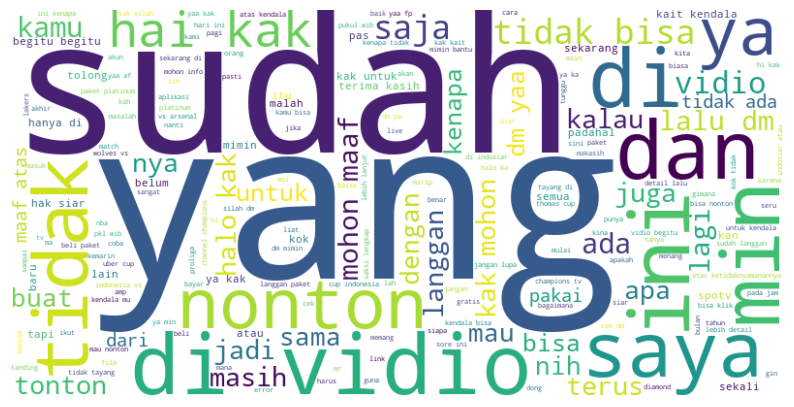

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Convert lists of full_texts into a single string
all_full_texts = ' '.join([full_text for sublist in train_data['full_text'] for full_text in sublist])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_full_texts)

# Display the WordCloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
comparison_df = pd.DataFrame({
    'Before ': eda_data['full_text'],
    'After ': train_data['full_text']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,@vidio kenapa match lavani vs PBS ga bisa diputar??? mau nonton ulang aksi Beik nih,"[kenapa, match, lavani, vs, pbs, tidak, bisa, putar, mau, nonton, ulang, aksi, beik, nih]"
1,@vidio ga mau ga ngasih solusi jg.. solusinya itu re-upload match Proliga nya @LavaniForever kemarin TITIK,"[tidak, mau, tidak, kasih, solusi, juga, solusi, itu, re, upload, match, proliga, nya, kemarin, titik]"
2,@vidio nyiarin indo vs usbek gk??,"[nyiarin, indo, vs, usbek, tidak]"
3,@vidio Kecewa banget udah berbayar tapi gak bisa nonton tim uber main,"[kecewa, sekali, sudah, bayar, tapi, tidak, bisa, nonton, tim, uber, main]"
4,@vidio Ohhhh di court 4 ternyata ga ada kamera emang,"[oh, di, court, nyata, tidak, ada, kamera, memang]"
5,@vidio Lah tau gitu mending saya langganan SPOTV aja‍️ Ini sampai final emang ga akan ditayangin apa gimana?,"[lah, tahu, begitu, mending, saya, langgan, spotv, saja, ini, sampai, final, memang, tidak, akan, ditayangin, apa, gimana]"
6,@vidio udah min mohon dicek,"[sudah, min, mohon, cek]"
7,@vidio saya udah langganan kenapa mau nonton gak bisa ya https://t.co/bFnHUcMLbh,"[saya, sudah, langgan, kenapa, mau, nonton, tidak, bisa, ya]"
8,@vidio Endingnya kayak Bourne Ultimatum,"[endingnya, mirip, bourne, ultimatum]"
9,@vidio min voli lavani vs sumsel babel gak bisa di tonton ulang yg tgl 28 kemarin,"[min, voli, lavani, vs, sumsel, babel, tidak, bisa, di, tonton, ulang, yang, tanggal, kemarin]"


In [ ]:

display(HTML(comparison_df.tail(1).to_html()))

,Before,After
930,Aliza (Naura Ayu) masak buat Kinaan aja bahagia banget Sementara itu Zero (Teuku Rassya) ngapain lagi nih sampe bikin Kinaan (Fadi Alaydrus) kesel banget kayak gini? Nonton #SantriPilihanBunda ep 5 sekarang hanya di Vidio #SantriPilihanBundaSeries #VidioOriginals https://t.co/nxYciYMv8j,"[aliza, naura, ayu, masak, buat, kina, saja, bahagia, sekali, sementara, itu, zero, teuku, rya, ngapain, lagi, nih, sampai, bikin, kina, fadi, alaydrus, kesal, sekali, mirip, gin, nonton, ep, sekarang, hanya, di, vidio]"


In [ ]:
train_data.to_csv("Dataset/Testing/Clean_testing_data_full3.csv")

OSError: Cannot save file into a non-existent directory: 'Dataset\Testing'